### 1.IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 2. DATA 

In [2]:
train_data = pd.read_csv("train.csv")
test_data_x = pd.read_csv("test.csv")

In [3]:
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# training data X and Y
train_data_x = pd.DataFrame(train_data.iloc[:,1:-1])
train_data_y = pd.DataFrame(train_data.iloc[:,-1])

print("Train X: ",train_data_x.shape)
print("Train Y: ",train_data_y.shape)

Train X:  (1460, 79)
Train Y:  (1460, 1)


### 3.EXPLORATORY DATA ANALYSIS

### Data visualisation

#### Log of Price - Y column

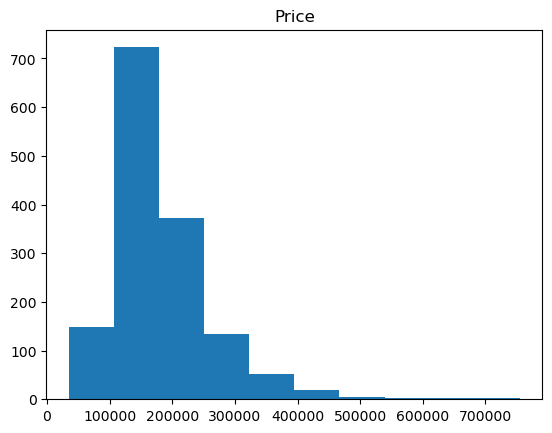

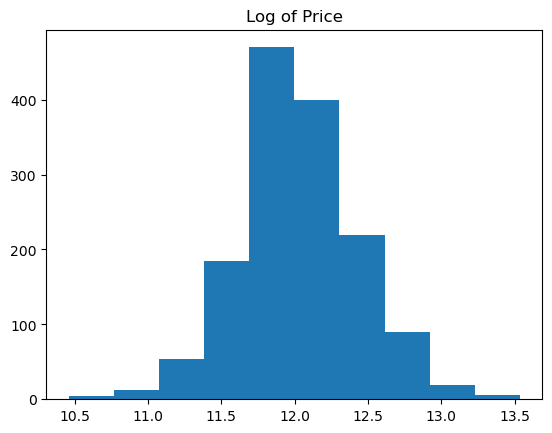

In [5]:
plt.hist(train_data_y)
plt.title("Price")
plt.show()
plt.hist(np.log(train_data_y))
plt.title("Log of Price")
plt.show()

#### Correlation

In [6]:
temp = train_data_x.join(train_data_y["SalePrice"])
temp_corr = temp.corr()
print(temp_corr.iloc[:,-1].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


/var/folders/7w/y0zmsm413vv3zxql2vkprc8w0000gp/T/ipykernel_6262/349120849.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp_corr = temp.corr()


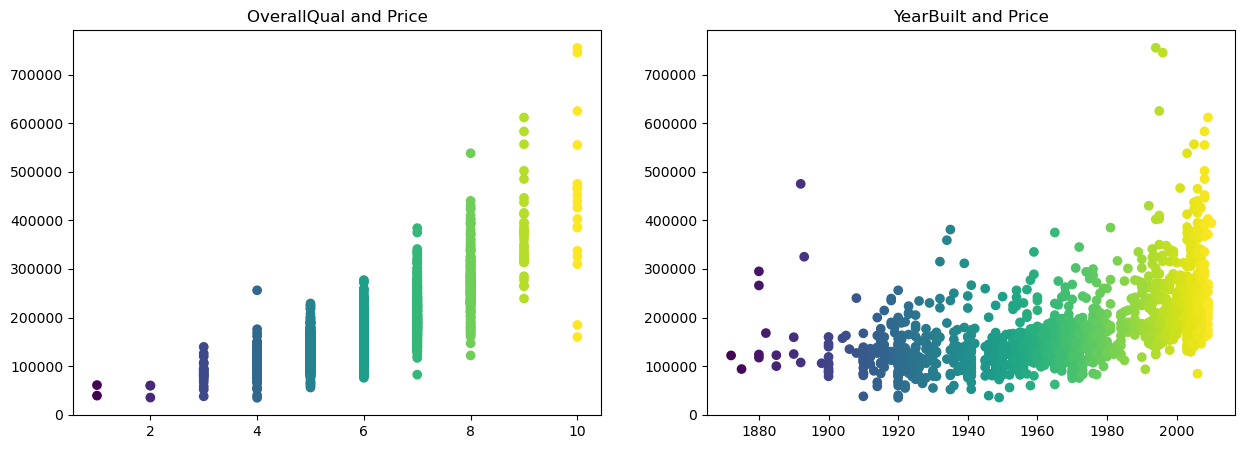

In [7]:
high_corr_cols = ["OverallQual","YearBuilt"]

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = ax.ravel()

for i,c in enumerate(high_corr_cols):
    ax[i].scatter(temp[c],temp["SalePrice"], c=temp[c], cmap="viridis")
    ax[i].set_title(f"{high_corr_cols[i]} and Price")

In [8]:
# Nan in the data
train_data_x.isna().sum().sort_values(ascending=False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
BedroomAbvGr       0
dtype: int64

### Identify column types and Handle nan

##### 1. CATEGORY ORDINALS

text columns that has order (eg:excellent>good>poor)

In [9]:
ordinal_cols = ["PoolQC","GarageCond","GarageQual","GarageFinish","FireplaceQu","KitchenQual","HeatingQC","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

# Null values in data
print(train_data_x[ordinal_cols].isna().sum().sort_values(ascending=False)[0:10])

#If NaN means "Not Applicable" / "No Feature", we fill NaN with "None"
for c in ordinal_cols:
    train_data_x[c] = train_data_x[c].fillna("None")
    
print("List of category ordinals:", ordinal_cols, "\nLen of columns:",len(ordinal_cols))

PoolQC          1453
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
dtype: int64
List of category ordinals: ['PoolQC', 'GarageCond', 'GarageQual', 'GarageFinish', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'] 
Len of columns: 14


##### 2. NUMERIC CATEGORIES WITH ORDER

numeric columns that has order (eg:10>9>8>7)

In [10]:
numeric_ord_cols = ["OverallQual","OverallCond"]

# Null values in data
print(train_data_x[numeric_ord_cols].isna().sum().sort_values(ascending=False)[0:5])

print("List of numeric ordinals:", numeric_ord_cols, "\nLen of columns:",len(numeric_ord_cols))

OverallQual    0
OverallCond    0
dtype: int64
List of numeric ordinals: ['OverallQual', 'OverallCond'] 
Len of columns: 2


##### 3. NUMERIC CATEGORIES WITHOUT ORDER
numeric columns that are just categories coded as a number (eg: 20 - one story building)

In [11]:
all_cols = train_data_x.columns.tolist()

text_candidates = train_data_x.select_dtypes(exclude=[np.number]).columns.tolist()
numeric_candidates = train_data_x.select_dtypes(include=[np.number]).columns.tolist()

numeric_cat_cols = ["MSSubClass"]

# Null values in data
print(train_data_x[numeric_cat_cols].isna().sum().sort_values(ascending=False)[0:5])

print("List of numeric categories:", numeric_cat_cols, "\nLen of columns:",len(numeric_cat_cols))


# ......HEURISTIC TO GET POSSIBLE NUMERIC CATEGORIES WHEN NUMERIC CATEGORIES HAS 
# LESS THAN "N" NUMBER OF UNIQUE VALUES AND NUMERIC VALUES HAS MORE THAN "N" VALUES

#def likely_numeric_categorical(s, max_unique=20):
#    return pd.api.types.is_integer_dtype(s) and s.nunique(dropna=True)<=max_unique
# 1)check pandas’ type-checking API that returns true if data is int32 or int64  
# 2)check number of unique values is less than 20

#numeric_cat_cols = [c for c in numeric_candidates if c not in ordinal_cols and c not in numeric_ord_cols and likely_numeric_categorical(train_data_x[c])]
#numeric_cols = [c for c in numeric_candidates if c not in ordinal_cols and c not in numeric_ord_cols and c not in numeric_cat_cols]

MSSubClass    0
dtype: int64
List of numeric categories: ['MSSubClass'] 
Len of columns: 1


##### 4. NUMERIC

numeric columns

In [12]:
numeric_cols = [c for c in numeric_candidates 
                    if c not in ordinal_cols and c not in numeric_ord_cols and c not in numeric_cat_cols]

# Missing values in numeric columns
print(train_data_x[numeric_cols].isna().sum().sort_values(ascending=False)[0:4])
print("\n",train_data.loc[:,["LotFrontage","GarageYrBlt","MasVnrArea"]].describe())

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
OpenPorchSF      0
dtype: int64

        LotFrontage  GarageYrBlt   MasVnrArea
count  1201.000000  1379.000000  1452.000000
mean     70.049958  1978.506164   103.685262
std      24.284752    24.689725   181.066207
min      21.000000  1900.000000     0.000000
25%      59.000000  1961.000000     0.000000
50%      69.000000  1980.000000     0.000000
75%      80.000000  2002.000000   166.000000
max     313.000000  2010.000000  1600.000000


In [13]:
# check if the missing values means not applicable (eg: if no garrage,garage year built is NA)
print(train_data_x.groupby(["GarageCond"]).agg(Garage_Year_na_count = ("GarageYrBlt",lambda x: x.isnull().sum())))
print(train_data_x.groupby(["MasVnrType"]).agg(MasVnrArea_na_count = ("MasVnrArea",lambda x: x.isnull().sum())))

            Garage_Year_na_count
GarageCond                      
Ex                             0
Fa                             0
Gd                             0
None                          81
Po                             0
TA                             0
            MasVnrArea_na_count
MasVnrType                     
BrkCmn                        0
BrkFace                       0
None                          0
Stone                         0


In [14]:
# Imputing 0 for GarageYrbuilt and MassVnrArea as it means no garage / vnr 
train_data_x["GarageYrBlt"] = train_data_x["GarageYrBlt"].fillna(0)
train_data_x["MasVnrArea"] = train_data_x["MasVnrArea"].fillna(0)
train_data_x["LotFrontage"] = train_data_x["MasVnrArea"].fillna(train_data_x["LotFrontage"].median())

print("List of numeric cols:", numeric_cols, "\nLen of columns:",len(numeric_cols))

List of numeric cols: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 
Len of columns: 33


##### 5. TEXT CATEGORIES
text columns

In [15]:
text_cols = [c for c in text_candidates if c not in ordinal_cols]

# Null values in data
print(train_data_x[text_cols].isna().sum().sort_values(ascending=False)[0:7])

# Here NA in MiscFeature, Alley, Fence, GarageType, MasVnrType means None / No
train_data_x["MiscFeature"] = train_data_x["MiscFeature"].fillna("None")
train_data_x["Alley"] = train_data_x["Alley"].fillna("None")
train_data_x["Fence"] = train_data_x["Fence"].fillna("None")
train_data_x["GarageType"] = train_data_x["GarageType"].fillna("None")
train_data_x["MasVnrType"] = train_data_x["MasVnrType"].fillna("None")

print("List of text cols:",text_cols,"\nLen of columns:",len(text_cols))

MiscFeature    1406
Alley          1369
Fence          1179
GarageType       81
MasVnrType        8
Electrical        1
MSZoning          0
dtype: int64
List of text cols: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 
Len of columns: 29


  ##### 6. MEDIUM CARDINALITY TEXT CATEGORIES
  high cardinality text columns - text columns with unique values greater than "N"

In [16]:
med_card_text = [c for c in text_cols if train_data_x[c].nunique(dropna=True) > 50]
print("List of high cardinality text cols:",med_card_text,"\nLen of columns:",len(med_card_text))

List of high cardinality text cols: [] 
Len of columns: 0


In [17]:
text_cols = [c for c in text_cols if c not in med_card_text]

In [18]:
#............CHECK FOR TOTAL NO OF COLS

In [19]:
print("Total no of cols:",len(ordinal_cols+numeric_cat_cols+numeric_ord_cols+numeric_cols+text_cols+med_card_text))

print("Ordinals:",len(ordinal_cols))
print("Numeric with order:",len(numeric_ord_cols))
print("Numeric without order:",len(numeric_cat_cols))
print("Numeric:",len(numeric_cols))
print("Text:",len(text_cols))
print("Medium card text:",len(med_card_text))


Total no of cols: 79
Ordinals: 14
Numeric with order: 2
Numeric without order: 1
Numeric: 33
Text: 29
Medium card text: 0


### 4.FEATURE ENGINEERING

### Combining features

In [20]:
# Total Area
train_data_x["TotalSF"] = train_data_x["GrLivArea"] + train_data_x["TotalBsmtSF"]

In [21]:
# Building Age
train_data_x["BuildingAge"] = train_data_x["YrSold"] - train_data_x["YearBuilt"]

In [22]:
# BedtoBath ratio
train_data_x["BedtoBath"] = train_data_x["BedroomAbvGr"] / train_data_x["FullBath"]

# division by 0 creates infinity - converting infinity to nan
train_data_x["BedtoBath"].replace([np.inf, -np.inf], np.nan, inplace=True)
# imputing nan as 0
train_data_x["BedtoBath"] = train_data_x["BedtoBath"].fillna(0)
np.isinf(train_data_x["BedtoBath"]).sum()

0

In [23]:
# Basement area
train_data_x["BsmntAr"] = train_data_x["BsmtFinSF1"] + train_data_x["BsmtFinSF2"]

In [24]:
#Porch Area
train_data_x["PorchAr"] = train_data_x["OpenPorchSF"] + train_data_x["EnclosedPorch"] + train_data_x["3SsnPorch"] + train_data_x["ScreenPorch"]


### Handling Skewed Features
For numeric features with skew > 1, apply log1p.

In [25]:
skewness = train_data_x[numeric_cols].skew()
skewness.sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
LotFrontage       2.677616
MasVnrArea        2.677616
OpenPorchSF       2.364342
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -3.869501
dtype: float64

In [26]:
print(skewness[skewness>1].index)

skewed_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')


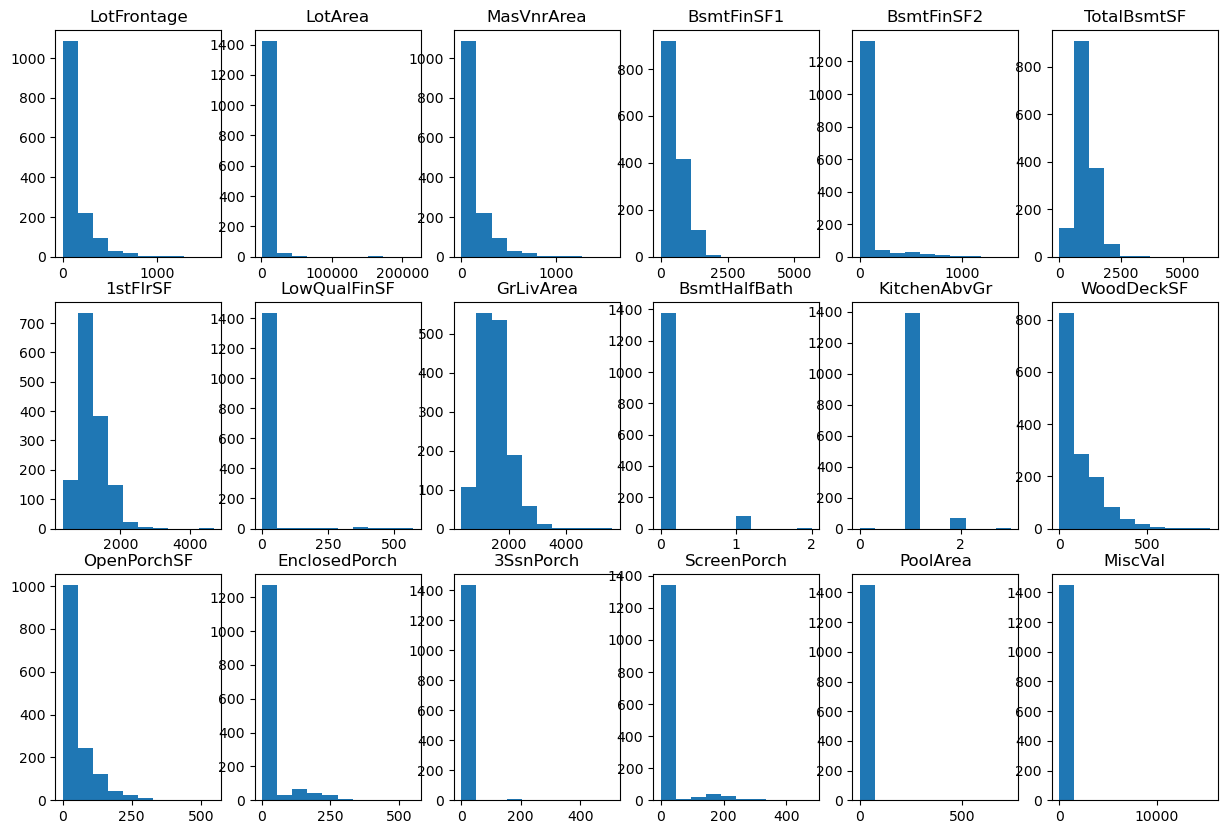

In [27]:
fig,ax = plt.subplots(3,6,figsize=(15,10))
ax = ax.ravel()

for i,c in enumerate(skewed_cols):
    ax[i].hist(train_data_x[c])
    ax[i].set_title(c)

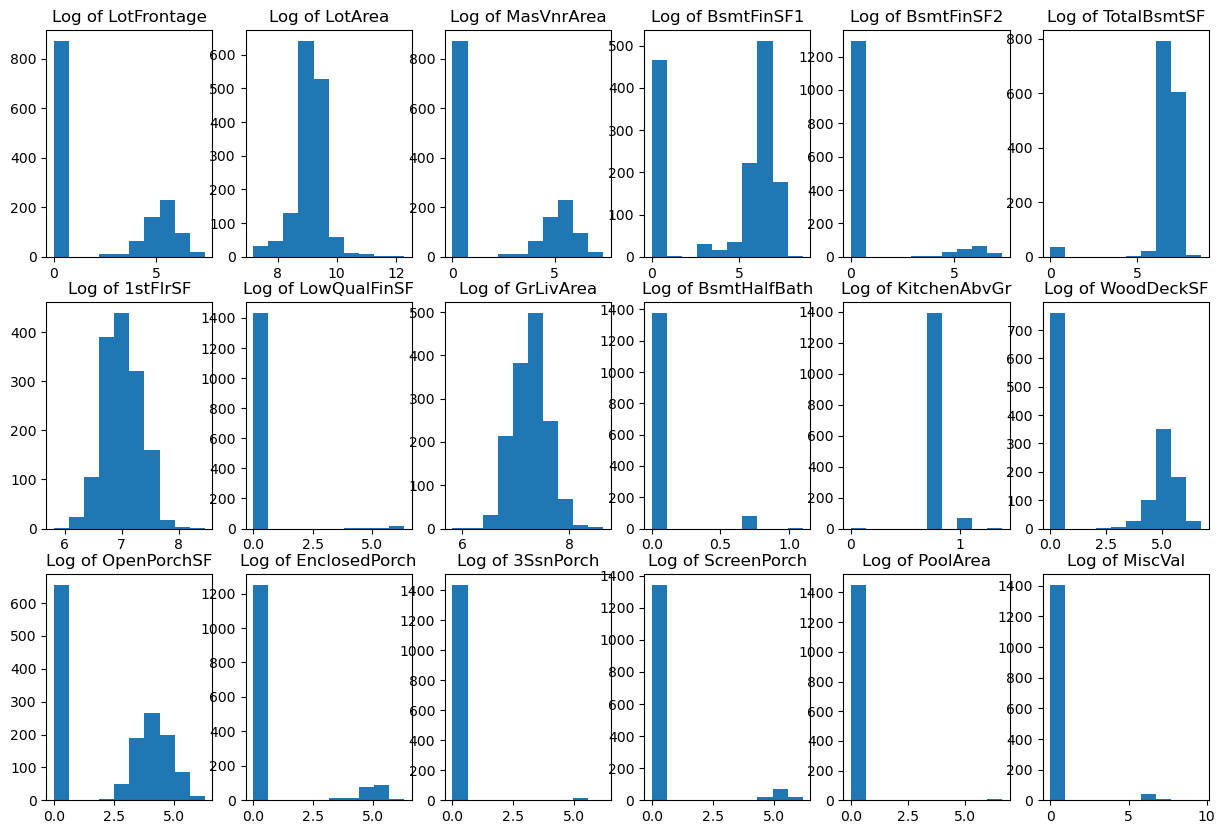

In [28]:
# Log of data for skewed columns
for s in skewed_cols:
    train_data_x[s] = np.log1p(train_data_x[s])
    
fig,ax = plt.subplots(3,6,figsize=(15,10))
ax = ax.ravel()

for i,c in enumerate(skewed_cols):
    ax[i].hist(train_data_x[c])
    ax[i].set_title(f"Log of {c}")

### Mutual Information

In [29]:
print("int64 columns:",train_data_x.select_dtypes("int64").columns)
print("\nfloat64 columns:",train_data_x.select_dtypes("float64").columns)
print("\nobject columns:",train_data_x.select_dtypes("object").columns)

int64 columns: Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'MoSold', 'YrSold', 'TotalSF', 'BuildingAge', 'BsmntAr',
       'PorchAr'],
      dtype='object')

float64 columns: Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'BedtoBath'],
      dtype='object')

object columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQua

In [30]:
#converting garage year built as integer from float
train_data_x["GarageYrBlt"] = train_data_x["GarageYrBlt"].convert_dtypes()
print(train_data_x["GarageYrBlt"].dtypes)

Int64


In [31]:
X = train_data_x.copy(deep=True)
Y = np.array(train_data_y).reshape((train_data_y.shape[0],))

In [32]:
for col in X.select_dtypes("object"):
    X[col],_ = X[col].factorize()

discrete_features = X.dtypes == int

In [33]:
#mutual information score calculation
from sklearn.feature_selection import mutual_info_regression

def get_mi_score(x,y, discrete_features):
    mi_scores = mutual_info_regression(x,y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, index = x.columns, name="mi_scores")
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
    
mi_scores = get_mi_score(X, Y, discrete_features)

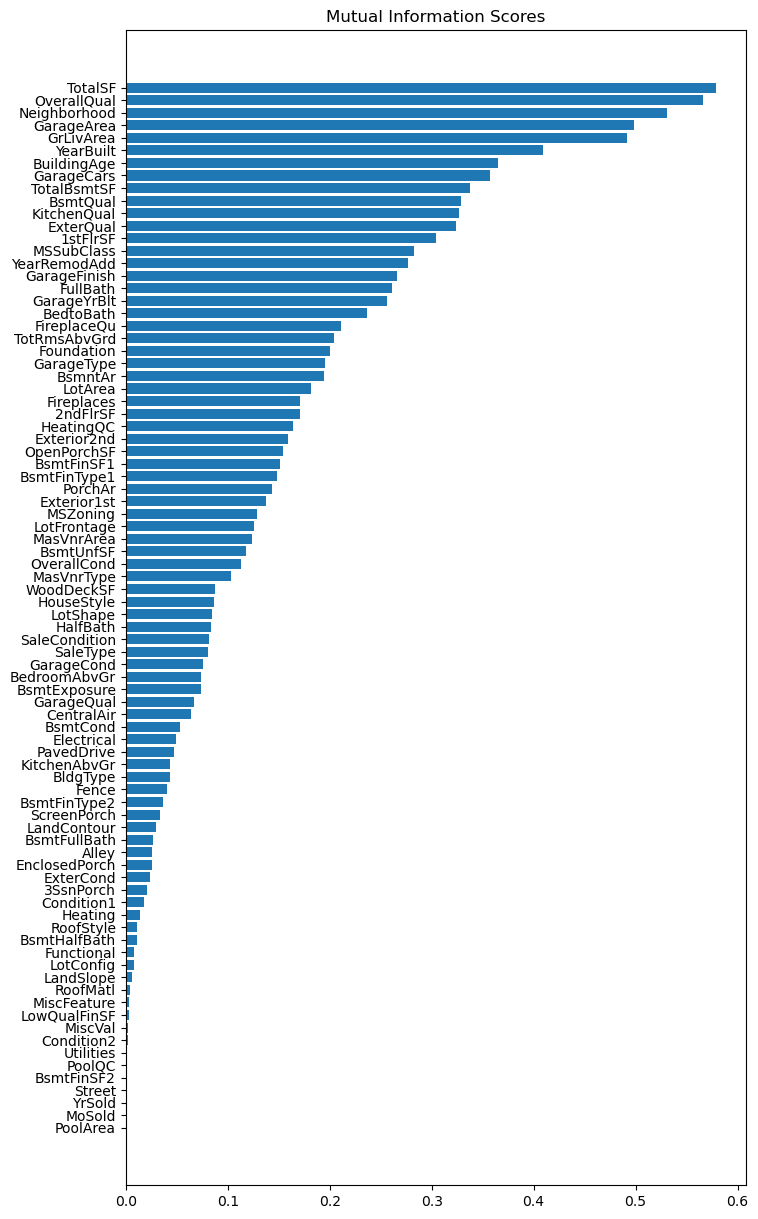

In [34]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 15))
plot_mi_scores(mi_scores)

In [35]:
print(mi_scores.sort_values(ascending=True)[0:11].index)

Index(['PoolArea', 'MoSold', 'YrSold', 'Street', 'BsmtFinSF2', 'PoolQC',
       'Utilities', 'Condition2', 'MiscVal', 'LowQualFinSF', 'MiscFeature'],
      dtype='object')


### Adding / Dropping features

In [82]:
drop_cols = ['3SsnPorch', 'Condition2','BsmtFinSF2']
added_cols = ["TotalSF", "BuildingAge", "BedtoBath", "BsmntAr", "PorchAr"]
train_data_x = train_data_x.drop(columns=drop_cols)

### Transformers

In [83]:
ordinal_cols_mod = [item for item in ordinal_cols if item not in drop_cols]
numeric_ord_cols_mod = [item for item in numeric_ord_cols if item not in drop_cols]
numeric_cat_cols_mod = [item for item in numeric_cat_cols if item not in drop_cols]

numeric_cols_mod = [item for item in numeric_cols if item not in drop_cols]
numeric_cols_mod = numeric_cols_mod + added_cols

text_cols_mod = [item for item in text_cols if item not in drop_cols]

In [84]:
ordinal_maps = {}

for c in ordinal_cols_mod:
    ordinal_maps[c] = train_data_x.loc[:,c].unique().tolist()
    
print(ordinal_maps)


# ordinal_maps = {
#   'PoolQC': ['Ex', 'Gd', 'TA', 'Fa', 'None'], 
#  'GarageCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], 
#  'GarageQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'],
#  'GarageFinish':['Fin', 'RFn', 'Unf', 'None'],
#  'FireplaceQu': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], 
#  'KitchenQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
#  'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 
#  'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], 
#  'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'],
#  'BsmtExposure': ['Gd', 'Av', 'Mn', 'No','None'],
#  'BsmtCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'],
#  'BsmtQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], 
#  'ExterQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 
#  'ExterCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po']
# }


{'PoolQC': ['None', 'Ex', 'Fa', 'Gd'], 'GarageCond': ['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'], 'GarageQual': ['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], 'GarageFinish': ['RFn', 'Unf', 'Fin', 'None'], 'FireplaceQu': ['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], 'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa'], 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'], 'ExterCond': ['TA', 'Gd', 'Fa', 'Po', 'Ex'], 'BsmtQual': ['Gd', 'TA', 'Ex', 'None', 'Fa'], 'BsmtCond': ['TA', 'Gd', 'None', 'Fa', 'Po'], 'BsmtExposure': ['No', 'Gd', 'Mn', 'Av', 'None'], 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'None', 'LwQ'], 'BsmtFinType2': ['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ']}


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer

##### 1. CATEGORY ORDINALS

In [86]:
# Transformer

ordinal_categories = [ordinal_maps[col] for col in ordinal_cols_mod]
ordinal_tf = Pipeline( steps = [
 ("imputer", SimpleImputer(strategy="most_frequent")),   
 ("encoder", OrdinalEncoder(
     categories=ordinal_categories, 
     handle_unknown="use_encoded_value", 
     unknown_value=-1))  
]
)

##### 2. NUMERIC CATEGORIES WITH ORDER

In [87]:
print("Unique values in the OverallQual column: ",len(train_data_x["OverallQual"].unique()))
print("Unique values in the OverallCond column: ",len(train_data_x["OverallCond"].unique()))

Unique values in the OverallQual column:  10
Unique values in the OverallCond column:  9


In [88]:
numeric_ord_tf = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
])

##### 3. NUMERIC CATEGORIES WITHOUT ORDER

In [89]:
print("Unique values in the column: ",len(train_data_x["MSSubClass"].unique()))

Unique values in the column:  15


In [90]:
# One Hot Encoding 

one_hot_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore",sparse_output=True))
]
)

##### 4. NUMERIC

In [91]:
# Build transformers

# numeric
numeric_tf = Pipeline(steps = [
 ("imputer",SimpleImputer(strategy="median")),   
 ("scaler",StandardScaler())
]
)

##### 5. TEXT CATEGORIES

In [92]:
for c in text_cols_mod:
    print(c, len(train_data_x[c].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
Foundation 6
Heating 6
CentralAir 2
Electrical 6
Functional 7
GarageType 7
PavedDrive 3
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


In [93]:
# transformer

one_hot_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore",sparse_output=True))
]
)

##### 6. COLUMN TRANSFORMER

In [94]:
transformers = []

if ordinal_cols_mod: #ordinal
    transformers.append(("ordinal",ordinal_tf, ordinal_cols_mod))
    
if numeric_ord_cols_mod: #number with order
    transformers.append(("numeric_ord",numeric_ord_tf,numeric_ord_cols_mod))

if numeric_cat_cols_mod: # number without order
    transformers.append(("numeric_cat",one_hot_tf, numeric_cat_cols_mod))
    
if numeric_cols_mod: # numeric
    transformers.append(("num",numeric_tf, numeric_cols_mod))

if text_cols_mod: #text cols
    transformers.append(("text",one_hot_tf, text_cols_mod))

In [95]:
preprocess = ColumnTransformer(transformers = transformers, sparse_threshold=0.3, remainder= "drop")

In [96]:
train_x, val_x, train_y, val_y = train_test_split(train_data_x,train_data_y, test_size=0.2, random_state=42)

In [97]:
preprocess.fit(train_x)

train_x_proc = preprocess.transform(train_x)
val_x_proc = preprocess.transform(val_x)

### 4. MODEL

#### BASELINE MODEL

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [57]:
val_y_proc = np.array(val_y).reshape((val_y.shape[0],))

In [58]:
print(val_x_proc.shape)
print(val_y_proc.shape)

(292, 251)
(292,)


In [59]:
baseline_model = RandomForestRegressor(random_state=42,criterion="absolute_error")
baseline_score = cross_val_score(baseline_model,val_x_proc,val_y_proc,cv=5, scoring="neg_mean_absolute_error")

baseline_score = -1 * baseline_score.mean()

In [60]:

print(f"MAE Baseline Score: {baseline_score}")

MAE Baseline Score: 20737.488621566335


In [ ]:
# Random Forest Baseline Model

MAE Baseline Score: 20737.488621566335

##### NEURAL NET MODEL

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.activations import relu, sigmoid, linear
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [98]:
tf.random.set_seed(1234)

model = Sequential([
    Dense(units=128,name="L1", activation="relu", input_shape=(train_x_proc.shape[1],)),
    Dense(units=64,name="L2", activation="relu"),    
    Dense(units=32,name="L3", activation="relu"),
    Dense(units=1,name="L4", activation="linear")], name="price_nn_model1")

/Users/Deephika/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss="mse", metrics=["mae"])
model.fit(
        train_x_proc, np.log(train_y),
        validation_data=(val_x_proc, np.log(val_y)),
        epochs=100,
        batch_size=32,
        verbose=1,
        #callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor="val_loss")]
    )

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.4430 - mae: 11.1641 - val_loss: 25.5160 - val_mae: 4.9990
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 9.5778 - mae: 2.5907 - val_loss: 1.1705 - val_mae: 0.9136
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.9688 - mae: 0.7792 - val_loss: 0.5728 - val_mae: 0.6140
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.5746 - mae: 0.6050 - val_loss: 0.4267 - val_mae: 0.5327
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.4358 - mae: 0.5280 - val_loss: 0.3383 - val_mae: 0.4714
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.3447 - mae: 0.4717 - val_loss: 0.2796 - val_mae: 0.4232
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.2797 - mae: 0.4255 - val_loss: 0.2413 - val_mae: 0.3895
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.2311 - mae: 0.3866 - val_loss: 0.2129 - val_mae: 0.3620
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 854u

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.0050 - mae: 0.0525 - val_loss: 0.0462 - val_mae: 0.1635
Epoch 55/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0048 - mae: 0.0515 - val_loss: 0.0458 - val_mae: 0.1627
Epoch 56/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.0046 - mae: 0.0500 - val_loss: 0.0456 - val_mae: 0.1622
Epoch 57/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.0044 - mae: 0.0493 - val_loss: 0.0452 - val_mae: 0.1615
Epoch 58/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.0043 - mae: 0.0482 - val_loss: 0.0451 - val_mae: 0.1610
Epoch 59/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0041 - mae: 0.0472 - val_loss: 0.0447 - val_mae: 0.1603
Epoch 60/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0039 - mae: 0.0461 - val_loss: 0.0447 - val_mae: 0.1602
Epoch 61/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.0038 - mae: 0.0454 - val_loss: 0.0444 - val_mae: 0.1596
Epoch 62/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step

In [100]:
#Evaluate on validation set
val_y_pred = np.exp(model.predict(val_x_proc))

mae = mean_absolute_error(val_y, val_y_pred)
rmse = np.sqrt(mean_squared_error(val_y, val_y_pred))

print(f"Validation MAE: {mae}")
print(f"Validation RMSE: {rmse}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation MAE: 28474.818359375
Validation RMSE: 44499.227498912835
